In [36]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Load Dataset
df = pd.read_csv("AAPL.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [38]:
# Handle Missing Values
# Check missing values
print(df.isnull().sum())
# Fill missing values using forward fill
df = df.fillna(method='ffill')
# If still missing, backfill
df = df.fillna(method='bfill')

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:

# Moving Averages
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Volatility (Rolling Std Dev)
df['Volatility_10'] = df['Close'].rolling(window=10).std()
df['Volatility_20'] = df['Close'].rolling(window=20).std()

# Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# Target Variable: Next 30-Day Close Price
df['Target_Close_30'] = df['Close'].shift(-30)

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_50,Volatility_10,Volatility_20,Daily_Return,Target_Close_30
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,276.932996,271.181998,259.6744,5.130104,7.221150,0.016318,NaN
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,278.511993,272.076997,260.6424,4.646479,7.687566,0.000951,NaN
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,280.425995,273.357997,261.7342,5.029357,8.421259,0.019840,NaN
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,282.259995,274.455997,262.8428,4.731653,9.070523,-0.000379,NaN
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,283.896994,275.669496,263.9676,4.829246,9.660051,0.005935,NaN


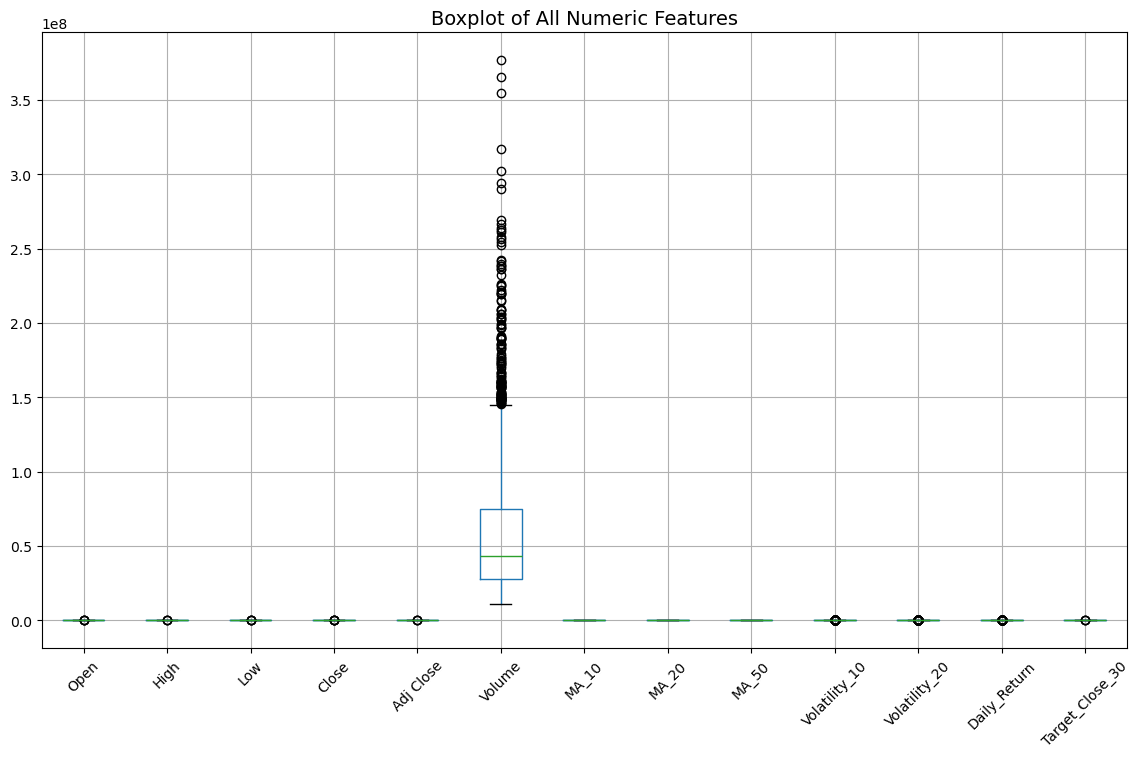

In [41]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(14, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot of All Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [42]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

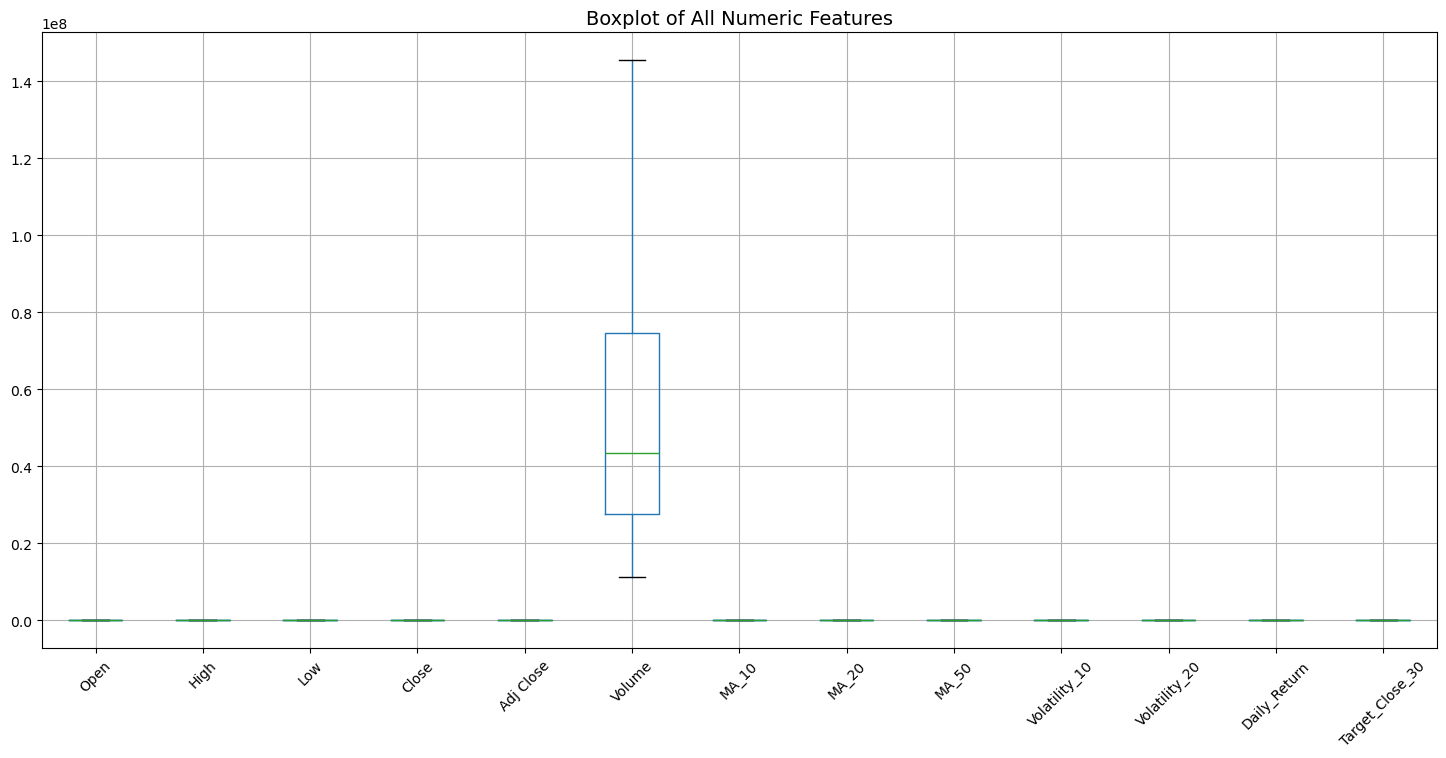

In [43]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(18, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot of All Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [44]:
# Drop Rows With NaN Target
df = df.dropna()

df.shape

(1932, 14)

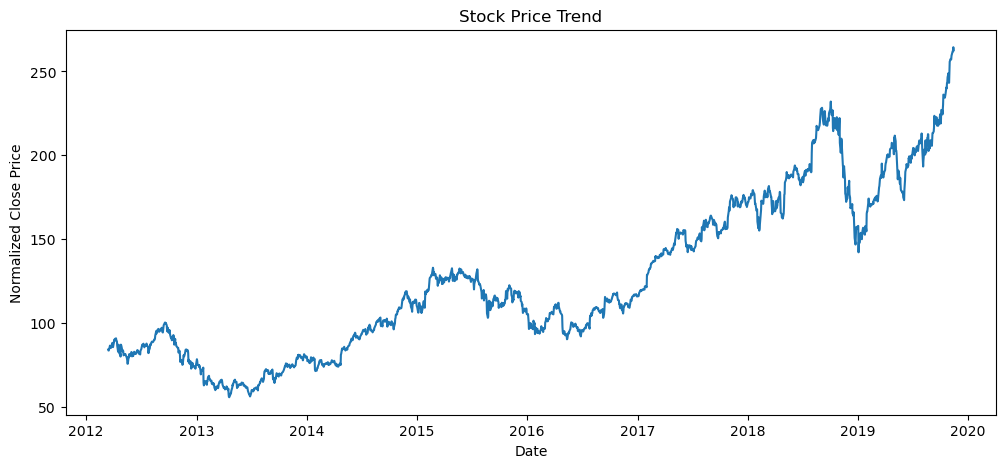

In [45]:
#EDA
# Plot Close Price Trend
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'])
plt.title("Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Normalized Close Price")
plt.show()

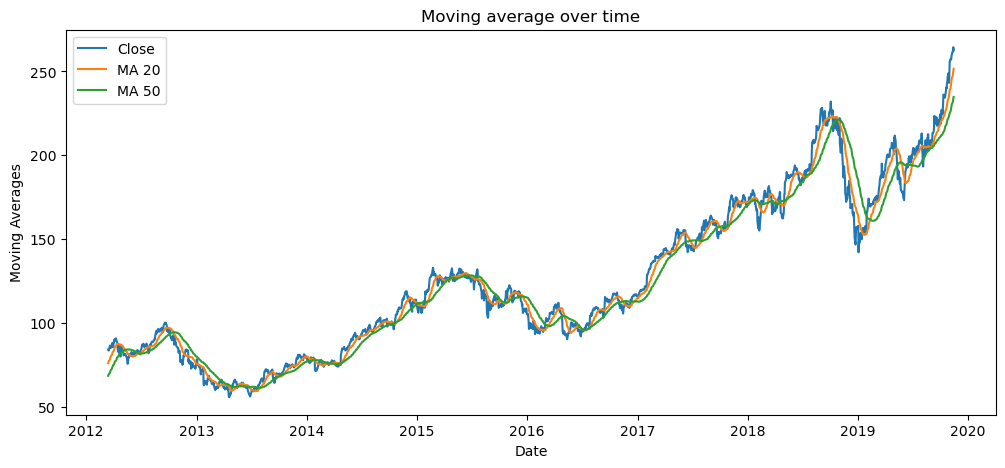

In [46]:
# Moving Averages Comparison
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_20'], label='MA 20')
plt.plot(df['Date'], df['MA_50'], label='MA 50')
plt.title('Moving average over time')
plt.ylabel("Moving Averages")
plt.xlabel("Date")
plt.legend()
plt.show()

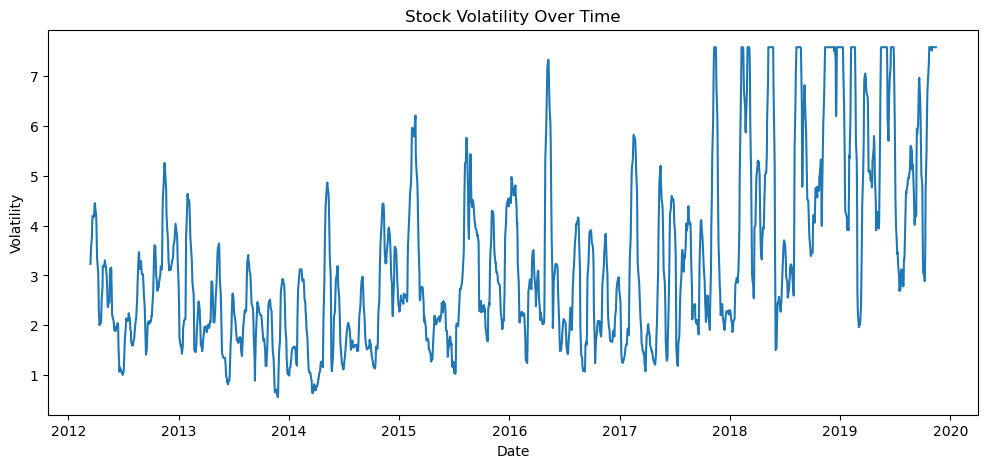

In [47]:
# Volatility visualization
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volatility_20'], label='20-Day Volatility')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Stock Volatility Over Time")
plt.show()


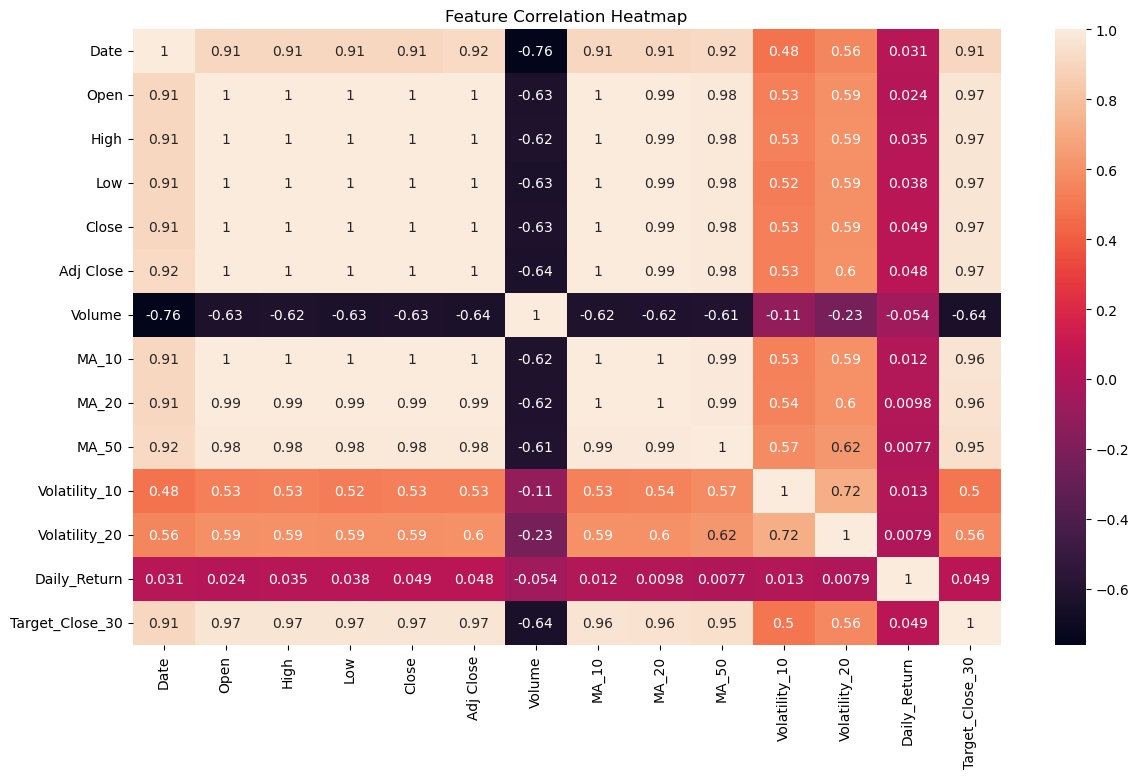

In [48]:
# Correlation Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [49]:
df = df.set_index('Date')

df = df.asfreq('B') 
df = df.ffill()

In [50]:
import yfinance as yf

spx = yf.download("^GSPC",
                  start=df.index.min().strftime("%Y-%m-%d"),
                  end=df.index.max().strftime("%Y-%m-%d"))

[*********************100%***********************]  1 of 1 completed


In [51]:
spx.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2012-03-14,1394.280029,1399.420044,1389.969971,1395.949951,4502280000
2012-03-15,1402.599976,1402.630005,1392.780029,1394.170044,4271650000
2012-03-16,1404.170044,1405.880005,1401.469971,1402.550049,5163950000
2012-03-19,1409.750000,1414.000000,1402.430054,1404.170044,3932570000
2012-03-20,1405.520020,1409.589966,1397.680054,1409.589966,3695280000


In [52]:
spx.columns = spx.columns.get_level_values(0)
spx['SPX_Close'] = spx['Close']
spx = spx[['SPX_Close']]
df = df.join(spx, how='left')
df = df.ffill()

In [53]:
for lag in [1,2,3,5,7]:
    df[f'Close_lag{lag}'] = df['Close'].shift(lag)
df['SPX_Return'] = df['SPX_Close'].pct_change()
df['SPX_Trend_5'] = df['SPX_Close'].rolling(5).mean()
df['SPX_Close_lag1'] = df['SPX_Close'].shift(1)
df['SPX_Return_lag1'] = df['SPX_Return'].shift(1)
df['SPX_Trend_5_lag1'] = df['SPX_Trend_5'].shift(1)

df['Rolling_Mean_20_lag1'] = df['Close'].rolling(20).mean().shift(1)
df['Rolling_Std_20_lag1'] = df['Close'].rolling(20).std().shift(1)

In [54]:
# STEP 4: Feature Engineering

# Moving Averages
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Volatility (Rolling Std Dev)
df['Volatility_10'] = df['Close'].rolling(window=10).std()
df['Volatility_20'] = df['Close'].rolling(window=20).std()

# Daily Returns
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return_lag1']=df['Daily_Return'].shift(1)
# Target Variable: Next 30-Day Close Price
df['Target_Close_30'] = df['Close'].shift(-30)

df['Log_Volume'] = np.log1p(df['Volume'])
df['Volatility_20'] = np.log1p(df['Volatility_20'])

df.tail()
cols = ['SPX_Close_lag1','Daily_Return_lag1','SPX_Return_lag1','SPX_Trend_5_lag1','Rolling_Mean_20_lag1','Rolling_Std_20_lag1','SPX_Close','SPX_Return','SPX_Trend_5','Close_lag1','Close_lag2','Close_lag3','Close_lag5','Close_lag7','Close','Open','High','Low','Volume','MA_10','MA_20',
        'Daily_Return','Volatility_10','Volatility_20','Log_Volume']
df = df[cols].dropna()

In [55]:
df.head()

,SPX_Close_lag1,Daily_Return_lag1,SPX_Return_lag1,SPX_Trend_5_lag1,Rolling_Mean_20_lag1,Rolling_Std_20_lag1,SPX_Close,SPX_Return,SPX_Trend_5,Close_lag1,...,Open,High,Low,Volume,MA_10,MA_20,Daily_Return,Volatility_10,Volatility_20,Log_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-11,1358.589966,-0.012244,-0.017081,1387.181958,87.274571,2.329619,1368.709961,0.007449,1381.131958,89.777145,...,90.885712,90.981430,89.048569,145397275.0,89.141428,87.536143,-0.003564,1.660878,1.182337,18.79498
2012-04-12,1368.709961,-0.003564,0.007449,1381.131958,87.536143,2.261987,1387.569946,0.013779,1379.029956,89.457146,...,89.285713,90.190002,88.642860,145397275.0,89.325857,87.801928,-0.005478,1.507104,1.127213,18.79498
2012-04-13,1387.569946,-0.005478,0.013779,1379.029956,87.801928,2.087041,1370.260010,-0.012475,1373.465967,88.967140,...,89.158569,89.242859,86.215714,145397275.0,89.406999,87.942357,-0.028164,1.293981,1.056784,18.79498
2012-04-16,1370.260010,-0.028164,-0.012475,1373.465967,87.942357,1.877102,1369.569946,-0.000504,1370.939966,86.461426,...,87.151428,87.182854,82.607140,145397275.0,88.856999,87.792571,-0.041472,2.441279,1.147607,18.79498
2012-04-17,1369.569946,-0.041472,-0.000504,1370.939966,87.792571,2.150644,1390.780029,0.015487,1377.377979,82.875717,...,82.705711,87.142860,81.701431,145397275.0,88.576713,87.819286,0.050971,2.468608,1.143548,18.79498


In [56]:
series = df.copy()
test_size = int(len(series) * 0.20)
train_raw = series[:-test_size].copy()
test_raw  = series[-test_size:].copy()

print(train_raw.shape, test_raw.shape)

(1586, 25) (396, 25)


In [57]:
y_train = train_raw['Close']
y_test  = test_raw['Close']

In [58]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

exog_cols = ['SPX_Close_lag1', 'Daily_Return_lag1', 'SPX_Return_lag1',
       'SPX_Trend_5_lag1', 'Rolling_Mean_20_lag1', 'Rolling_Std_20_lag1',
       'SPX_Close', 'SPX_Return', 'SPX_Trend_5', 'Close_lag1', 'Close_lag2',
       'Close_lag3', 'Close_lag5', 'Close_lag7', 'Open', 'High',
       'Low', 'MA_10', 'MA_20', 'Volatility_10',
       'Volatility_20', 'Log_Volume']
sarimax_cols = ['Low','High','Open','SPX_Return','Close_lag1','SPX_Trend_5_lag1']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_raw[exog_cols])
X_test_scaled  = scaler.transform(test_raw[exog_cols])

X_train = pd.DataFrame(X_train_scaled, index=train_raw.index, columns=exog_cols)
X_test  = pd.DataFrame(X_test_scaled, index=test_raw.index, columns=exog_cols)

In [59]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [60]:
import pmdarima as pm

auto_model = pm.auto_arima(
    y_train,
    exogenous=X_train[['Low', 'High', 'Open', 'SPX_Return', 'Close_lag1', 'SPX_Trend_5_lag1']],
    seasonal=True,
    m=7,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    d=1, D=1,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
order = auto_model.order
seasonal_order = auto_model.seasonal_order
print(f"Best model:  ARIMA{order}({seasonal_order})[7]")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=7091.751, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=6578.406, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.53 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=7086.020, Time=0.18 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=6463.168, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=3.28 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=2.25 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=6463.385, Time=0.32 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=6465.110, Time=0.57 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=6465.136, Time=0.53 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=6463.145, Time=0.59 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=6578.499, Time=0.34 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=inf, Time=3.64 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,2)(2,1,0)[7]             : AIC=6465.124, Time=0

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    y_train,
    exog=X_train[['Low', 'High', 'Open', 'SPX_Return', 'Close_lag1', 'SPX_Trend_5_lag1']],
    order=order,
    seasonal_order=seasonal_order
)

res = model.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1586
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 7)   Log Likelihood               -1343.381
Date:                            Wed, 26 Nov 2025   AIC                           2706.761
Time:                                    22:20:35   BIC                           2760.401
Sample:                                04-11-2012   HQIC                          2726.693
                                     - 05-09-2018                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Low                 22.2189      0.316     70.369      0.000      21.600      22.838
High             

In [62]:
pred = res.get_prediction(
    start=y_test.index[0],
    end=y_test.index[-1],
    exog=X_test[['Low', 'High', 'Open', 'SPX_Return', 'Close_lag1', 'SPX_Trend_5_lag1']]
)

y_pred = pred.predicted_mean

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R²  :", r2)

RMSE: 1.2546293888996867
MAE: 0.9550755306698547
MAPE: 0.4882748561375509
R²  : 0.997192538973238


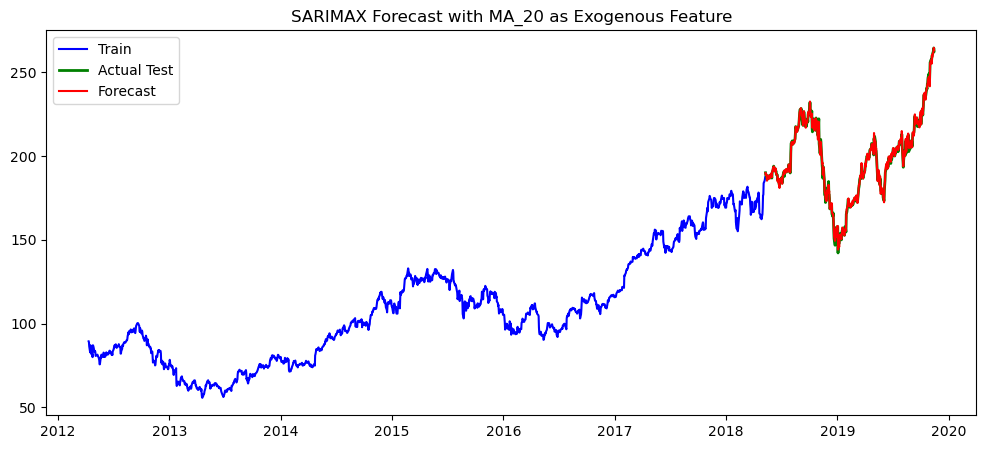

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(y_train, label='Train', color='blue')
plt.plot(y_test, label='Actual Test', color='green', linewidth=2)
plt.plot(y_pred, label='Forecast', color='red')

plt.legend()
plt.title("SARIMAX Forecast with MA_20 as Exogenous Feature")
plt.show()


In [66]:
print(pd.DataFrame({'Actual': y_test[:5], 'Forecast': y_pred[:5]}))


                Actual    Forecast
2018-05-10  190.039993  189.886431
2018-05-11  188.589996  188.753276
2018-05-14  188.149994  188.954720
2018-05-15  186.440002  185.286919
2018-05-16  188.179993  186.953379


In [65]:
import pickle

with open("sarimax_model.pkl", "wb") as f:
    pickle.dump(res, f)

with open("feature_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model & Scaler saved successfully!")


Model & Scaler saved successfully!
